<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [2]:
# Define the URL of the dataset
file_path = r"C:\Users\21650\Downloads\survey_data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
## Write your code here
df.describe(include='all')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,56182,56238,2.343500e+04,29126.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50207,23911,39041,23015,65437,9993,24942,3674,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38767,30071,NaN,NaN
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,NaN,NaN,1.867570e+05,2.088259
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.079715e+05,8.000000


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [41]:
## Write your code here
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [ ]:
## Write your code here 
##optional by me
df_missing_values=df.isnull().sum().reset_index()
df_missing_values.columns=["Column_Name","Missing_Values_Count"]
df_missing_values.sort_values(by="Missing_Values_Count",ascending=False).head(10)

,Column_Name,Missing_Values_Count
75,AINextMuch less integrated,64289
74,AINextLess integrated,63082
72,AINextNo change,52939
71,AINextMuch more integrated,51999
36,EmbeddedAdmired,48704
35,EmbeddedWantToWorkWith,47837
34,EmbeddedHaveWorkedWith,43223
112,ConvertedCompYearly,42002
70,AIToolNot interested in Using,41023
73,AINextMore integrated,41009


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



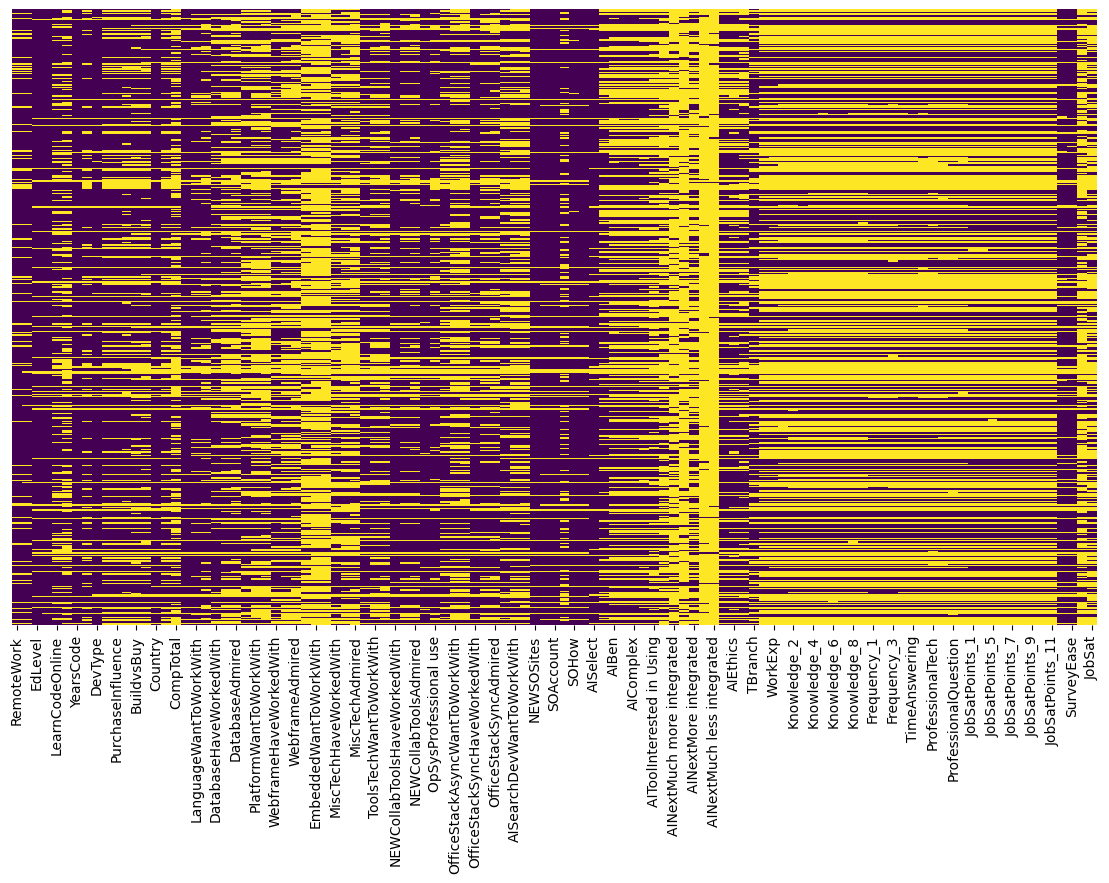

In [37]:
## Write your code here
cols_with_nan=df.columns[df.isna().any()]
plt.figure(figsize=(14,8))
sns.heatmap(df[cols_with_nan].sample(500,random_state=37).isnull(),cmap="viridis",cbar=False)
plt.yticks([])
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [45]:
## Write your code here
col="Employment"
print(f"the number of missing values at column {col}: {df[col].isna().sum()}")

the number of missing values at column Employment: 0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [48]:
## Write your code here
freq_entry=df["Employment"].value_counts().idxmax()
freq_entry

'Employed, full-time'

##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [49]:
## Write your code here
df["Employment"].fillna(freq_entry,inplace=True)

### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


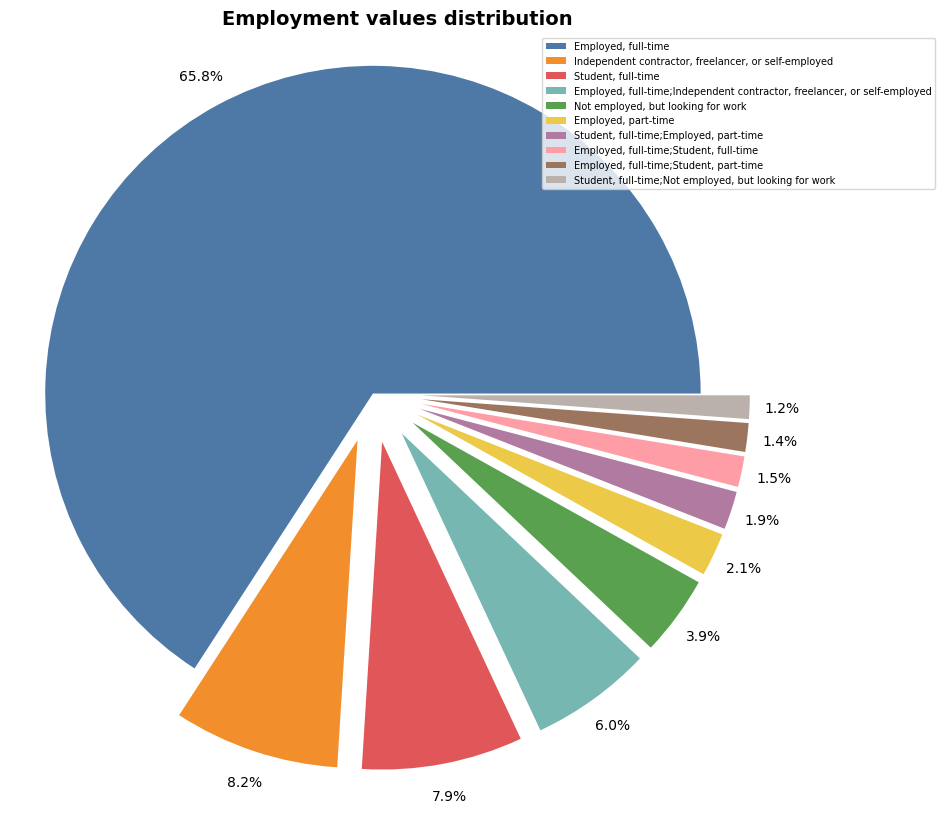

In [82]:
## Write your code here
empl_counts=df["Employment"].value_counts()
pie_colors = [
    "#4E79A7",  # muted blue
    "#F28E2B",  # orange
    "#E15759",  # reddish pink
    "#76B7B2",  # teal
    "#59A14F",  # green
    "#EDC948",  # yellow
    "#B07AA1",  # purple
    "#FF9DA7",  # light pink
    "#9C755F",  # brown
    "#BAB0AC"   # gray
]
explode_list=[0]+[.15]*9
plt.figure(figsize=(10,10))
plt.pie(x=empl_counts.values[:10],autopct="%1.1f%%",pctdistance=1.1,colors=pie_colors,explode=explode_list)
plt.legend(empl_counts.index[:10],fontsize=7,loc="upper right",bbox_to_anchor=[1.2,1])
plt.title("Employment values distribution",fontsize=14,fontweight="bold")
plt.axis("equal")
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
